In [ ]:
from base import np
# import importlib
# import threeD
# importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a non-uniform spherical layer with varying starting positions ($r_0$) and lengths ($l$), with the restriction $r_0 + l \leq L$.

$$
c_{\text{sharp}}(r; r_0,l) = 
\begin{cases} 
\frac{1}{4 \pi l} \frac{1}{r^2} & \text{if } r_0 \leq r \leq r_0 + l, \\
0 & \text{otherwise}.
\end{cases}
$$

In [9]:
def sharp_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_sharp(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = (4*np.pi*l*r**2)**(-1)
        # Return c where the condition is True, otherwise return 0
        return np.where(cond , c , 0)
    return c_sharp

sharpstep_title = lambda Tc: (
        'Diatom Flux under Varying Bacterial Sharped Step Distributions'
        + f'\n$T_c={Tc}$'
    )

Iterations completed: 100%|██████████| 28002/28002 [01:46<00:00, 263.73it/s]


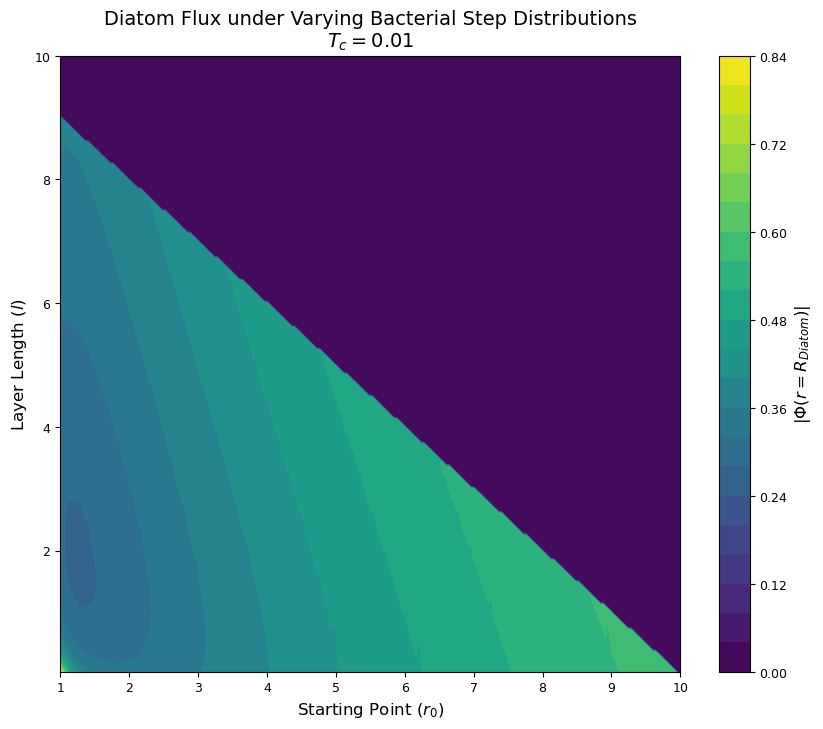

In [ ]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': 1e-2,
    # Number of points
    'nr': 100000,
    'n_r0': 250,'n_l': 250
}
FM = FluxMap3D(syst_params, sharp_generator)
FM.solve(n_jobs=-1)
FM.plot()

Iterations completed: 100%|██████████| 28002/28002 [01:10<00:00, 396.88it/s]


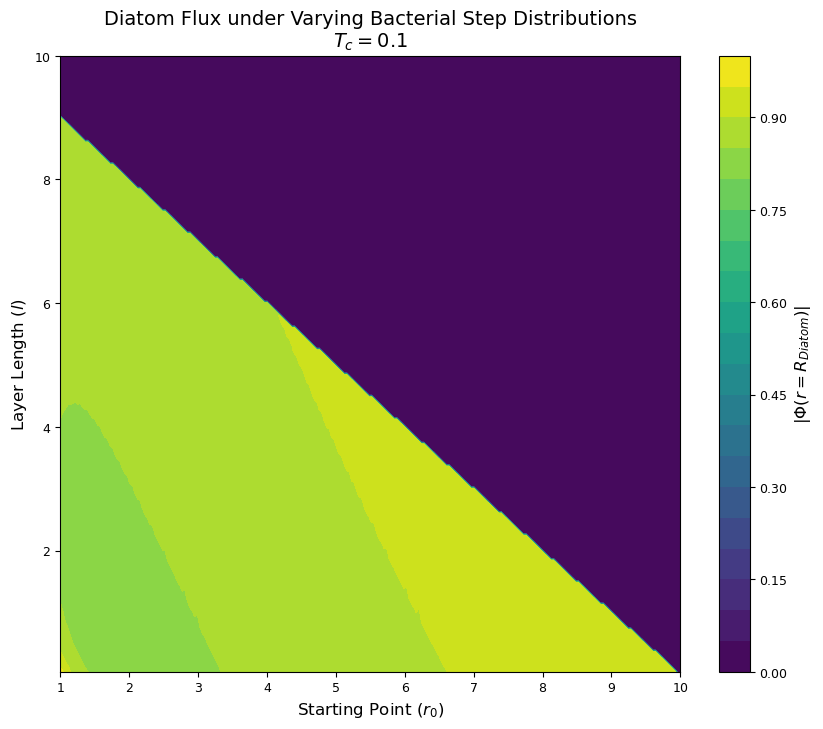

In [ ]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': 1e-1,
    # Number of points
    'nr': 100000,
    'n_r0': 250,'n_l': 250
}
FM = FluxMap3D(syst_params, sharp_generator)
FM.solve(n_jobs=-1)
FM.plot()